<a href="https://colab.research.google.com/github/vaneesa-writes/micro_project/blob/main/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize

In [2]:
path='/content/drive/MyDrive/dataset/pokemon'

In [4]:
all_classes=os.listdir(path)
all_classes

['Fearow',
 'Meowth',
 'Dratini',
 'Psyduck',
 'Pikachu',
 'Spearow',
 'Squirtle',
 'Bulbasaur',
 'Aerodactyl',
 'Charmander']

In [98]:
# os.mkdir('/content/drive/MyDrive/dataset/pokemon/val')

In [107]:
import shutil

In [101]:
# for p in os.listdir(path)[:-1]:
#   os.mkdir('/content/drive/MyDrive/dataset/pokemon/val/'+p)
#   all_images=os.listdir(path+'/'+p)
#   np.random.shuffle(all_images)
#   num = int(len(all_images)*0.2)
#   all_images = all_images[:num]
#   source = path+'/'+p+'/'
#   destination = '/content/drive/MyDrive/dataset/pokemon/val/'+p+'/'
  
#   for f in all_images:
#     shutil.move(source + f, destination + f)

In [ ]:
# os.listdir('/content/drive/MyDrive/dataset/pokemon/val/Dratini')

In [106]:
# os.mkdir('/content/drive/MyDrive/dataset/poke_val')

In [108]:
# shutil.move('/content/drive/MyDrive/dataset/pokemon/val', '/content/drive/MyDrive/dataset/poke_val/')

'/content/drive/MyDrive/dataset/poke_val/val'

In [72]:
def draw_sub_plots(n,m,X,Y):
  f, axarr = plt.subplots(n,m,figsize=((15, 15)))
  ind=0
  for row in range(n):
    for col in range(m):

      img = X[ind].reshape((128,128,3))
      #img = img /225.0
      axarr[row, col].axis("off")
      axarr[row,col].imshow(img)
      label = Y[ind]
      title = label
      title_color = 'b'
      title = axarr[row, col].set_title(title)
      plt.setp(title, color=title_color)
      ind+=1

In [52]:
X_disp = np.zeros((9, 128, 128, 3), dtype=np.uint8)
Y_disp = []

for i,p in enumerate(os.listdir(path)[:9]):

  all_images=os.listdir(path+'/'+p)
  img = imread(path + '/' + p + '/' + all_images[5] )[:,:,:3]  
  img = resize(img, (128, 128), mode='constant', preserve_range=True)
  X_disp[i]=img
  Y_disp.append(str(p))

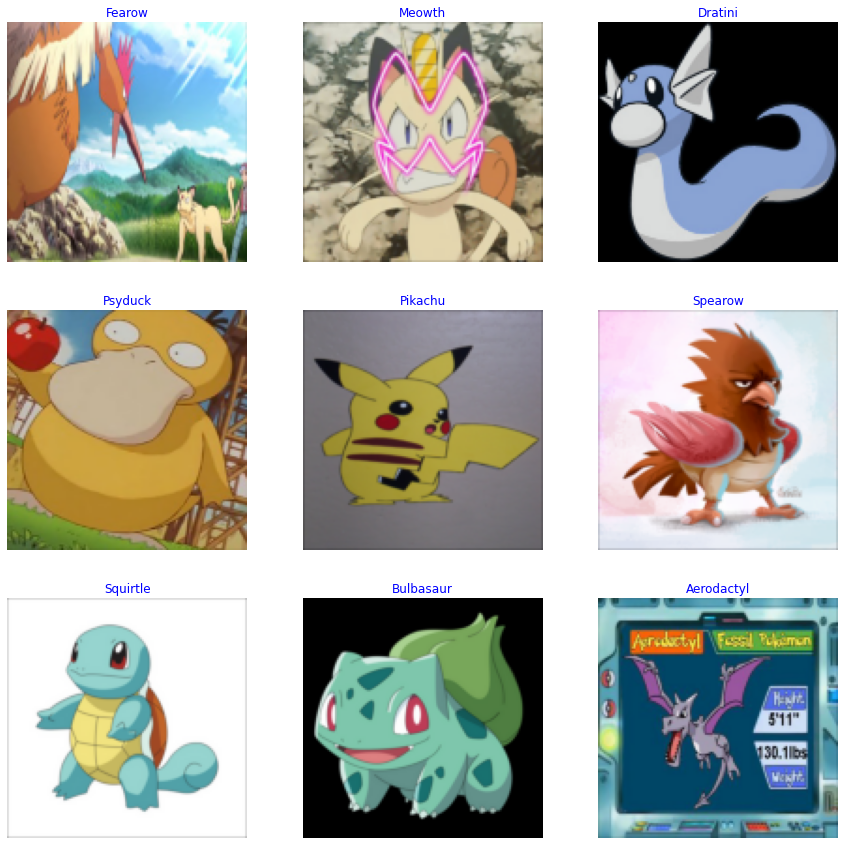

In [74]:
draw_sub_plots(3,3,X_disp,Y_disp)

In [109]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    horizontal_flip = True
    )


val_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_gen.flow_from_directory(
    "/content/drive/MyDrive/dataset/pokemon",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = val_gen.flow_from_directory(
    "/content/drive/MyDrive/dataset/poke_val/val",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1319 images belonging to 10 classes.
Found 323 images belonging to 10 classes.


In [154]:
train_generator.class_indices

{'Aerodactyl': 0,
 'Bulbasaur': 1,
 'Charmander': 2,
 'Dratini': 3,
 'Fearow': 4,
 'Meowth': 5,
 'Pikachu': 6,
 'Psyduck': 7,
 'Spearow': 8,
 'Squirtle': 9}

In [110]:
import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np



In [ ]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(128,128,3))
model.summary()

In [ ]:
from keras.layers import * 
from keras.models import Model
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(10,activation='softmax')(d1)

model_new = Model(inputs=model.input,outputs=fc2)

model_new.summary()

In [113]:
print(len(model_new.layers))

179


In [122]:
for _ in range(172):
  model_new.layers[_].trainable = False

In [ ]:
model_new.summary()

In [167]:
import tensorflow as tf
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                              monitor='val_loss',
                             verbose=1, 
                             save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [125]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.00003)
model_new.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
history = model_new.fit_generator(train_generator,steps_per_epoch=41,epochs=20,callbacks=my_callbacks,validation_data=val_generator,validation_steps=5)

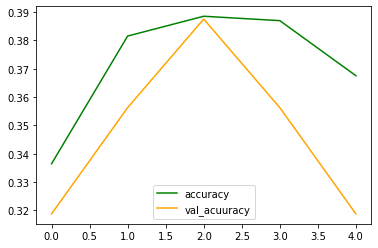

In [130]:
plt.style.use('_classic_test_patch')
plt.plot(history.history['accuracy'],c='green',label='accuracy')
plt.plot(history.history['val_accuracy'],c='orange',label='val_acuuracy')
plt.legend()
plt.show()

In [131]:
model_new.load_weights('/content/model.03-1.66.h5')

In [ ]:
!wget https://static.wikia.nocookie.net/wii/images/8/89/Pikachu.jpg/revision/latest?cb=20140209205851

In [ ]:
!wget https://images.saymedia-content.com/.image/t_share/MTc2Mjk3OTE1NzAxMDExNjI5/pokemon-bulbasaur-nicknames.jpg

In [160]:
img = imread('pokemon-bulbasaur-nicknames.jpg')[:,:,:3]  
img = resize(img, (128, 128), mode='constant', preserve_range=True)

In [161]:
img.shape

(128, 128, 3)

In [162]:
arr = np.zeros((1, 128, 128, 3), dtype=np.uint8)

In [163]:
arr[0]=img

In [166]:
pred=model_new.predict(arr)

print(pred)
pred = np.argmax(pred)


print(pred)
pred

[[3.1930682e-05 1.6243909e-03 1.7467421e-01 1.0448522e-03 1.7598720e-03
  2.5469051e-06 1.7303255e-03 7.9681098e-01 1.4276460e-02 8.0445325e-03]]
7


7